# COVID-19 Twitter Analysis

In [46]:
import os
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sn
%matplotlib inline
import numpy as np
#from wordcloud import WordCloud
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from IPython.display import display, HTML
import networkx as nx
from scipy.spatial.distance import pdist, squareform
from sklearn.decomposition import KernelPCA
from sklearn.manifold import TSNE
import itertools
#import gensim
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_validate,LeaveOneOut,KFold

import nltk
from nltk.corpus import stopwords
import re


import warnings
warnings.filterwarnings("ignore")

**What are news sites tweeting about?** 

**How often is coronavirus brought up in their tweets?**

In [47]:
# import the dataset of tweets from news sites 
tweets = pd.read_csv('D:/NEU/Individual Projects/Covid19 Project/latest_clean_tweets.csv', header = 0, index_col = None)
tweets.head()

,Tweet Id,Text,Date,Time,hashtag,Tweet_punct,Tweet_tokenized,Tweet_nostop,Tweet_stemmed,Tweet_lemmatized,news_site
0,1318742328757059584,"""Although it is a serious disease, I feel fort...",2020-10-21,02:34:06,[],Although it is a serious disease I feel fortun...,"['although', 'it', 'is', 'a', 'serious', 'dise...","['although', 'serious', 'disease', 'feel', 'fo...","['although', 'seriou', 'diseas', 'feel', 'fort...","['although', 'serious', 'disease', 'feel', 'fo...",ABC
1,1318739549116375040,AUTUMN COLORS: Aerial footage captured by a dr...,2020-10-21,02:23:04,[],AUTUMN COLORS Aerial footage captured by a dro...,"['autumn', 'colors', 'aerial', 'footage', 'cap...","['autumn', 'colors', 'aerial', 'footage', 'cap...","['autumn', 'color', 'aerial', 'footag', 'captu...","['autumn', 'color', 'aerial', 'footage', 'capt...",ABC
2,1318738053696028672,Breonna Taylor grand jury members say they wer...,2020-10-21,02:17:07,[],Breonna Taylor grand jury members say they wer...,"['breonna', 'taylor', 'grand', 'jury', 'member...","['breonna', 'taylor', 'grand', 'jury', 'member...","['breonna', 'taylor', 'grand', 'juri', 'member...","['breonna', 'taylor', 'grand', 'jury', 'member...",ABC
3,1318735525109506048,Security footage shows a disgruntled customer ...,2020-10-21,02:07:04,[],Security footage shows a disgruntled customer ...,"['security', 'footage', 'shows', 'a', 'disgrun...","['security', 'footage', 'shows', 'disgruntled'...","['secur', 'footag', 'show', 'disgruntl', 'cust...","['security', 'footage', 'show', 'disgruntled',...",ABC
4,1318731497415806977,"""They really run the risk of becoming extinct ...",2020-10-21,01:51:04,[],They really run the risk of becoming extinct i...,"['they', 'really', 'run', 'the', 'risk', 'of',...","['really', 'run', 'risk', 'becoming', 'extinct...","['realli', 'run', 'risk', 'becom', 'extinct', ...","['really', 'run', 'risk', 'becoming', 'extinct...",ABC


We'd like to know the following:

1. What are the most common words in their tweets?
2. How often is coronavirus brought up in their tweets?
3. Identifying topics among tweets of news sources

In [48]:
# create corpus of tweets and convert all words to lowercase
corpus = []
for i in tweets['Tweet_punct']:
    i = str(i).lower()
    corpus.append(i)
corpus[0:3]

['although it is a serious disease i feel fortunate that i have a great team of doctors and the prognosis is good',
 'autumn colors aerial footage captured by a drone photographer in massachusetts offers a glimpse of new englands f',
 'breonna taylor grand jury members say they were not presented with homicide charges']

In [49]:
import nltk
import itertools

from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words = stopwords.words('english'))

In [50]:
# counts of words in the corpus ignoring stop words

cv_fit=cv.fit_transform(corpus)

# vocab in the tweets
vocab = cv.get_feature_names()

# counts of words in the tweets
vocab_counts = cv_fit.toarray().sum(axis=0)


In [51]:
print(type(vocab))
print(type(vocab_counts))
print("No of unique words in the corpus are:",len(vocab))
print(len(vocab_counts))

<class 'list'>
<class 'numpy.ndarray'>
No of unique words in the corpus are: 35845
35845


In [52]:
# create a dictionary of the vocabulary with counts as values
vocabdic = dict(zip(vocab,vocab_counts))

In [53]:
# sort dictionary by counts of words descending
sorteddic = sorted(vocabdic.items(), key=lambda x: x[1], reverse=True)

In [54]:
# 20 most used words in tweets by news sites
print(sorteddic[0:20])

[('trump', 6238), ('president', 4570), ('new', 3821), ('us', 2611), ('coronavirus', 2550), ('covid19', 2450), ('biden', 2352), ('nan', 2293), ('says', 1984), ('trumps', 1837), ('people', 1827), ('one', 1794), ('first', 1738), ('election', 1646), ('joe', 1588), ('court', 1557), ('white', 1386), ('pandemic', 1354), ('said', 1343), ('house', 1310)]


In [55]:
# dataframe of word and its corresponding count
counts_df = pd.DataFrame()

counts_df['word'] = vocab
counts_df['counts'] = vocab_counts

counts_df.head()

,word,counts
0,00,8
1,01,3
2,05pm,1
3,09,2
4,09am,1


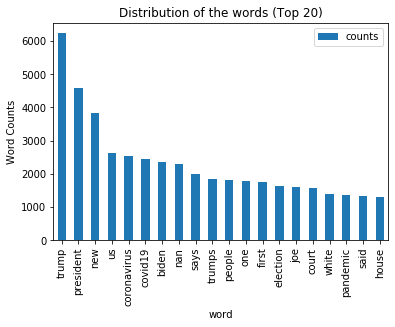

In [56]:
# bar plot of the 20 most common words
ax = counts_df.sort_values(by="counts", ascending=False).head(20)\
        .plot(x="word", y="counts", kind="bar")
ax.set_title("Distribution of the words (Top 20)")
b = ax.set_ylabel("Word Counts")

**coronavirus or covid19 is the hot topic among tweet. Trump, Biden and White House are also common occurences.**

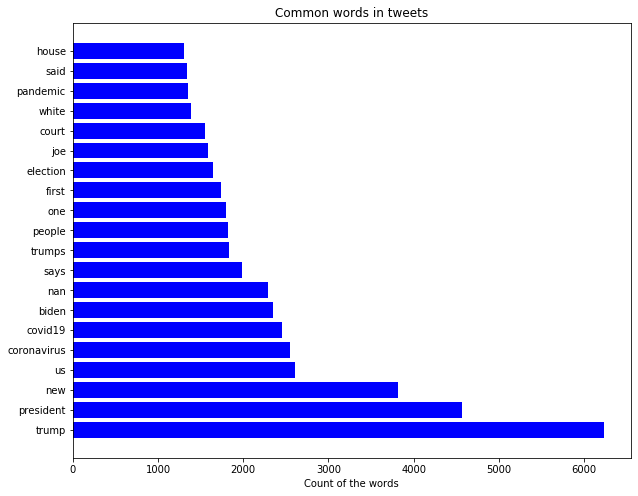

In [57]:
ax = counts_df.sort_values(by="counts", ascending=False).head(20)

plt.figure(figsize=(10, 8))
plt.barh(ax['word'], ax['counts'], color="blue")
plt.title("Common words in tweets")
plt.xlabel("Count of the words")
plt.show()

In [58]:
cv2 = CountVectorizer(ngram_range=(2, 2), min_df = 0.001, stop_words = stopwords.words('english'))

# counts of words in the corpus ignoring stop words
cv_fit2=cv2.fit_transform(corpus)

# vocab in the tweets
bigrams = cv2.get_feature_names()

# counts of words in the tweets
bigram_counts = cv_fit2.toarray().sum(axis=0)


In [59]:
# dataframe of bigram and its corresponding count
bigrams_counts_df = pd.DataFrame()

bigrams_counts_df['bigram'] = bigrams
bigrams_counts_df['counts'] = bigram_counts

bigrams_counts_df.head()

,bigram,counts
0,absentee ballots,52
1,across country,66
2,across us,52
3,amid pandemic,59
4,amy coney,846


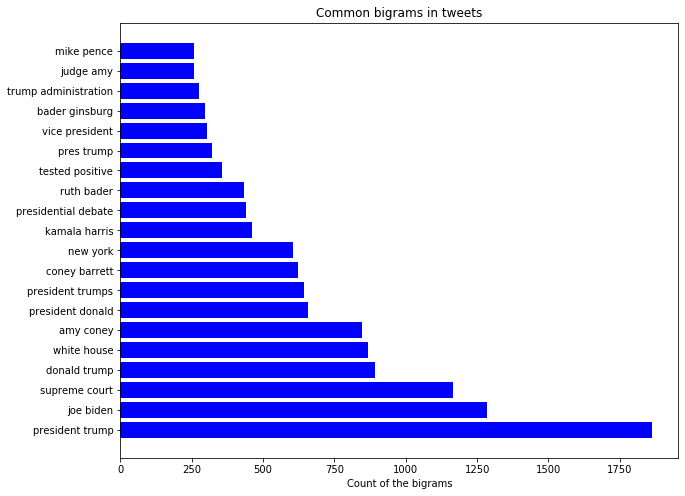

In [60]:
ax = bigrams_counts_df.sort_values(by="counts", ascending=False).head(20)

plt.figure(figsize=(10, 8))
plt.barh(ax['bigram'], ax['counts'], color="blue")
plt.title("Common bigrams in tweets")
plt.xlabel("Count of the bigrams")
plt.show()

**we see a lot of nouns in common bigrams like 'president trump' or 'kamala harris' etc but among all these nouns, there is 
another bigram 'tested positive' which is indicative of the covid-19 pandemic**

Judging by these bigrams, trigrams like 'Amy Coney Barrett', 'Ruth Bader Ginsburg' and 'President Donald Trump' might be the 
3 most common trigrams in any order.

In [61]:
cv3 = CountVectorizer(ngram_range=(3, 3), min_df = 0.005, stop_words = stopwords.words('english'))

# counts of words in the corpus ignoring stop words
cv_fit3=cv3.fit_transform(corpus)

# vocab in the tweets
trigrams = cv3.get_feature_names()

# counts of words in the tweets
trigram_counts = cv_fit3.toarray().sum(axis=0)

print(trigrams)
print(trigram_counts)

['amy coney barrett', 'president donald trump', 'ruth bader ginsburg']
[615 532 297]


**as hypothesized, the 3 trigrams mentioned above are the most common among tweets during the days when I scraped them**

Now, we'll filter the tweets mentioning coronavirus and analyze them


In [62]:
covid_words = ['coronavirus', 'covid19', 'covid', 'corona', 'virus', 'pandemic']

new_corpus = []
for j in range(len(corpus)):
    for word in covid_words:
        if word in corpus[j].split():
            new_corpus.append(corpus[j])

    


In [63]:
# new_corpus has the tweets related to coronavirus
cvnc = CountVectorizer(stop_words = stopwords.words('english'))

cvnc_fit=cvnc.fit_transform(new_corpus)

# vocab in the tweets
vocab = cvnc.get_feature_names()

# counts of words in the tweets
vocab_counts = cvnc_fit.toarray().sum(axis=0)



In [64]:
# dataframe of word and its corresponding count
counts_df = pd.DataFrame()

counts_df['word'] = vocab
counts_df['counts'] = vocab_counts

counts_df.head()

,word,counts
0,01,2
1,05pm,1
2,10,1
3,10000,3
4,102,1


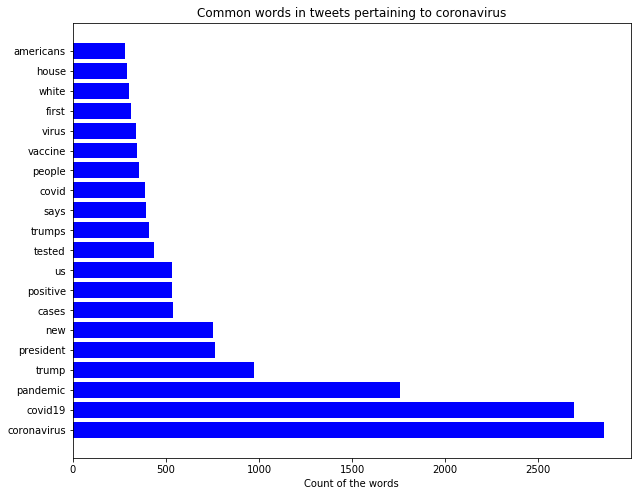

In [65]:
ax = counts_df.sort_values(by="counts", ascending=False).head(20)

plt.figure(figsize=(10, 8))
plt.barh(ax['word'], ax['counts'], color="blue")
plt.title("Common words in tweets pertaining to coronavirus")
plt.xlabel("Count of the words")
plt.show()

**'coronavirus', 'covid19' and 'pandemic' are the most common words in tweets pertaining to coronavirus which is of no surprise**

'tested' and 'positive' are common too indicating coronavirus testing. Tweets also mention a 'vaccine' which might be discovered for treatment of covid19.

In [66]:
# bigrams among coronavirus tweets
cvnc2 = CountVectorizer(ngram_range=(2, 2), stop_words = stopwords.words('english'))

cvnc_fit2=cvnc2.fit_transform(new_corpus)

# vocab in the tweets
bigrams = cvnc2.get_feature_names()

# counts of words in the tweets
bigram_counts = cvnc_fit2.toarray().sum(axis=0)



In [67]:
# dataframe of bigram and its corresponding count
bigrams_counts_df = pd.DataFrame()

bigrams_counts_df['bigram'] = bigrams
bigrams_counts_df['counts'] = bigram_counts

bigrams_counts_df.head()

,bigram,counts
0,01 et,2
1,10 days,1
2,10000 people,3
3,102 trillion,1
4,104 passeng,1


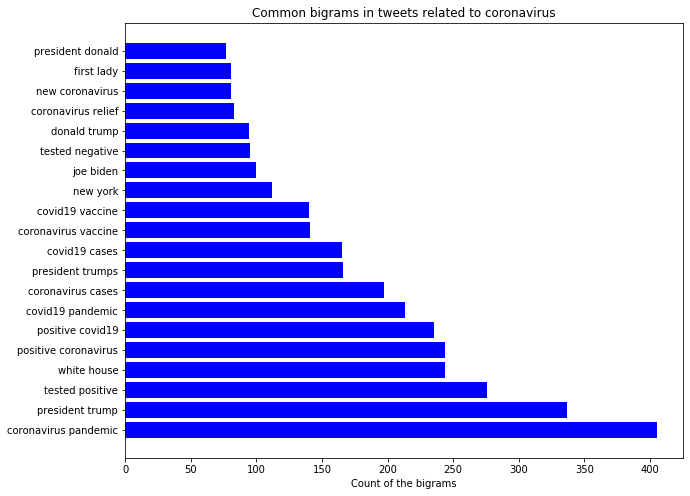

In [68]:
ax = bigrams_counts_df.sort_values(by="counts", ascending=False).head(20)

plt.figure(figsize=(10, 8))
plt.barh(ax['bigram'], ax['counts'], color="blue")
plt.title("Common bigrams in tweets related to coronavirus")
plt.xlabel("Count of the bigrams")
plt.show()

**Now we'll do some preliminary comparison between (CNN,NBC) and (FoxNews,Breitbart)**

In [69]:
comparison_df1 = tweets.loc[(tweets['news_site'] == 'CNN') | (tweets['news_site'] == 'NBC')]
comparison_df2 = tweets.loc[(tweets['news_site'] == 'Fox') | (tweets['news_site'] == 'Breitbart')]

In [70]:
# create corpus of tweets and convert all words to lowercase
corpus1 = []
for i in comparison_df1['Tweet_punct']:
    i = str(i).lower()
    corpus1.append(i)
    
# create corpus of tweets and convert all words to lowercase
corpus2 = []
for i in comparison_df2['Tweet_punct']:
    i = str(i).lower()
    corpus2.append(i)

In [71]:
# new_corpus has the tweets related to coronavirus
cvc1 = CountVectorizer(stop_words = stopwords.words('english'))
cvc2 = CountVectorizer(stop_words = stopwords.words('english'))


cvc_fit1=cvc1.fit_transform(corpus1)
cvc_fit2=cvc2.fit_transform(corpus2)

# vocab for each corpus
vocab1 = cvc1.get_feature_names()
vocab2 = cvc2.get_feature_names()


# counts of words in the tweets
vocab1_counts = cvc_fit1.toarray().sum(axis=0)
vocab2_counts = cvc_fit2.toarray().sum(axis=0)

In [72]:
# dataframe of word and its corresponding count for CNN and NBC
word_counts_df1 = pd.DataFrame()

word_counts_df1['word'] = vocab1
word_counts_df1['counts'] = vocab1_counts


In [73]:
# dataframe of word and its corresponding count for CNN and NBC
word_counts_df2 = pd.DataFrame()

word_counts_df2['word'] = vocab2
word_counts_df2['counts'] = vocab2_counts


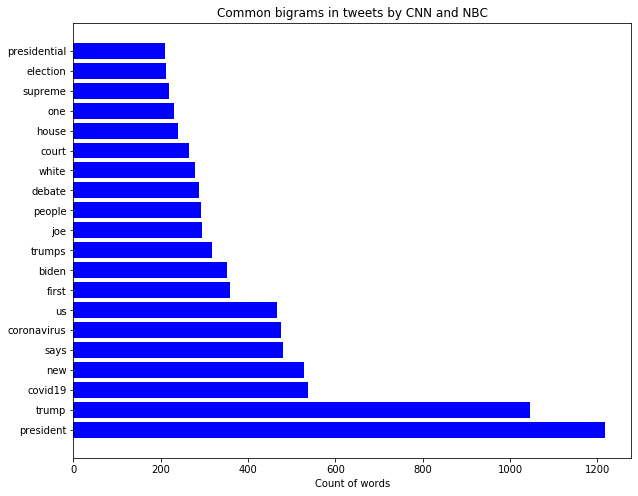

In [74]:
# common words in tweets by CNN and NBC
ax = word_counts_df1.sort_values(by="counts", ascending=False).head(20)

plt.figure(figsize=(10, 8))
plt.barh(ax['word'], ax['counts'], color="blue")
plt.title("Common bigrams in tweets by CNN and NBC")
plt.xlabel("Count of words")
plt.show()

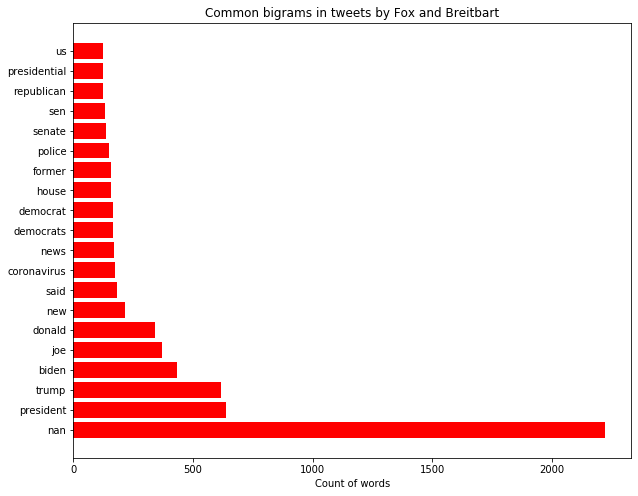

In [75]:
# common words in tweets by Fox and Breitbart
ax = word_counts_df2.sort_values(by="counts", ascending=False).head(20)

plt.figure(figsize=(10, 8))
plt.barh(ax['word'], ax['counts'], color="red")
plt.title("Common bigrams in tweets by Fox and Breitbart")
plt.xlabel("Count of words")
plt.show()

**As you can see, 'coronavirus' and 'covid19' are mentioned more on CNN and NBC when compared to Fox and Breitbart. Infact 'covid19' is not even in the 20 most common words in tweets of Fox and Breitbart**







# Preprocessing for topic modeling on tweets by news sites

In [76]:
tweets_lda = tweets.drop(tweets.loc[tweets['news_site']=='ABC'].index, inplace=True)

df = tweets.groupby('news_site').agg({'Tweet_punct':lambda x: list(x)})
#df = df.groupby('news_site')['Tweet_punct'].apply(list)
df

,Tweet_punct
news_site,
BBC,[One million plant and animal species face ext...
Breitbart,[POLLAK If Joe Biden wins he will bring back t...
CBS,[Orionids one of the the best meteor showers o...
CNN,[Amsterdam is famed for being cyclefriendly bu...
FiveThirtyEight,[The most competitive races arent in Michigan ...
Fox,[Californians not wearing masks will be allowe...
NBC,[Connecticut revises travel quarantine rules t...
NPR,[From the beauty of everyday life to the myste...
Nytimes,[Most American men who plan to vote but havent...


In [77]:
docs = []

for i in range(len(df['Tweet_punct'])):
    docs.append(''.join(str(df['Tweet_punct'][i]).lower()).replace("[","").replace("]","").replace("'","").replace(",","").replace("\"",""))
    

**remove stopwords from the tweets**

In [78]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [79]:
text_tokens = []
tokens_without_sw = [None]*len(docs)
filtered_sentence = []

for i in range(len(docs)):
    text_tokens.append(word_tokenize(docs[i]))
    tokens_without_sw[i] = [word for word in text_tokens[i] if not word in stopwords.words('english')]
    filtered_sentence.append((" ").join(tokens_without_sw[i]))


In [80]:
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer

**vectorize the documents**

In [81]:
from nltk.tokenize import RegexpTokenizer

def docs_preprocessor(docs):
    tokenizer = RegexpTokenizer(r'\w+')
    for idx in range(len(docs)):
        #docs[idx] = docs[idx].lower()  # Convert to lowercase.
        docs[idx] = tokenizer.tokenize(docs[idx])  # Split into words.

    # Remove numbers, but not words that contain numbers.
    docs = [[token for token in doc if not token.isdigit()] for doc in docs]
    
    # Remove words that are only one character.
    docs = [[token for token in doc if len(token) > 1] for doc in docs]
    
    # Lemmatize all words in documents.
    lemmatizer = WordNetLemmatizer()
    docs = [[lemmatizer.lemmatize(token) for token in doc] for doc in docs]
  
    return docs

In [82]:
docs = docs_preprocessor(filtered_sentence)


**compute bigrams and trigrams**

In [83]:
from gensim.models import Phrases
bigram = Phrases(docs, min_count=10)
trigram = Phrases(bigram[docs])

for idx in range(len(docs)):
    for token in bigram[docs[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            docs[idx].append(token)
    for token in trigram[docs[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            docs[idx].append(token)

In [84]:
from gensim.corpora import Dictionary

# Create a dictionary representation of the tweets from news site.
dictionary = Dictionary(docs)
print('Number of unique words in initital documents:', len(dictionary))

Number of unique words in initital documents: 34945


In [85]:
# vectorize the data
# bag of words model
corpus = [dictionary.doc2bow(doc) for doc in docs]


In [86]:
print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))

Number of unique tokens: 34945
Number of documents: 15


# Train the LDA model

In [87]:
from gensim.models import LdaModel

In [88]:
num_topics = 15
chunksize = 550 # size of the doc looked at every pass
passes = 20 # number of passes through documents
iterations = 300
eval_every = 1  # Don't evaluate model perplexity, takes too much time.

# Make a index to word dictionary.
temp = dictionary[0]  # This is only to "load" the dictionary.
id2word = dictionary.id2token

%time model = LdaModel(corpus=corpus, id2word=id2word, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)

Wall time: 20.7 s


**visualizing the LDA clusters of topics**

In [89]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [90]:
pyLDAvis.gensim.prepare(model, corpus, dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
12     0.210872 -0.024690       1        1  38.561756
11     0.231984 -0.014115       2        1  20.588240
10     0.171787  0.035636       3        1  19.420835
5      0.224445 -0.016592       4        1  10.007284
14     0.199431 -0.162748       5        1   6.168475
2      0.235343  0.170809       6        1   5.253226
9     -0.144526  0.001523       7        1   0.000022
0     -0.144408  0.001495       8        1   0.000021
1     -0.142509  0.001344       9        1   0.000021
13    -0.142749  0.001239      10        1   0.000020
8     -0.140800  0.001259      11        1   0.000020
6     -0.140032  0.001298      12        1   0.000020
3     -0.137258  0.001120      13        1   0.000020
4     -0.141582  0.001434      14        1   0.000019
7     -0.139998  0.000988      15        1   0.000019, topic_info=      Category         Freq              Term        Total  loglift  logprob
18863  Default  2127.000000           nan_nan  2127.000000  30.0000  30.0000
4098   Default  2209.000000               nan  2209.000000  29.0000  29.0000
6484   Default  7427.000000             trump  7427.000000  28.0000  28.0000
10888  Default  1679.000000  president_donald  1679.000000  27.0000  27.0000
10893  Default  7075.000000   president_trump  7075.000000  26.0000  26.0000
...        ...          ...               ...          ...      ...      ...
6528   Topic15     0.000004               two   844.971191  -3.5883 -10.1539
1905   Topic15     0.000005          election  1669.424927  -4.2489 -10.1336
881    Topic15     0.000004          campaign   936.148315  -3.7004 -10.1636
1507   Topic15     0.000005               day  1356.523560  -4.0580 -10.1503
4452   Topic15     0.000004          pandemic  1233.137451  -3.9758 -10.1634

[1071 rows x 6 columns], token_table=       Topic      Freq            Term
term                                  
11         3  0.986806        30pm_amp
12671      1  0.115537  alexey_navalny
12671      2  0.885784  alexey_navalny
29660      2  0.809537         alllast
213        1  0.220634         america
...      ...       ...             ...
6998       2  0.161332            year
6998       3  0.324547            year
6998       4  0.038293            year
6998       5  0.042059            year
6998       6  0.058381            year

[1185 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[13, 12, 11, 6, 15, 3, 10, 1, 2, 14, 9, 7, 4, 5, 8])

**Words specific to topics**

In [92]:
words = [re.findall(r'"([^"]*)"',t[1]) for t in model.print_topics()]

topics = [' '.join(t[0:10]) for t in words]

# Getting the topics
for id, t in enumerate(topics): 
    print(f"------ Topic {id} ------")
    print(t, end="\n\n")

------ Topic 0 ------
trump u president new president_trump say one year joe_biden coronavirus

------ Topic 1 ------
president_trump trump u say new president supreme_court covid19 year election

------ Topic 2 ------
trump election election_forecast president american poll president_trump gt covid19 biden

------ Topic 3 ------
trump president_trump president new president_donald supreme_court joe_biden u say biden

------ Topic 4 ------
trump president_trump president_donald joe_biden president new white_house u biden supreme_court

------ Topic 5 ------
nan nan_nan president_donald joe_biden trump president nan_nan_nan_nan biden president_trump joe

------ Topic 6 ------
trump president_trump new president covid19 u white_house supreme_court one year

------ Topic 7 ------
president_trump trump president joe_biden say coronavirus new covid19 u supreme_court

------ Topic 8 ------
trump president_trump president white_house coronavirus new supreme_court joe_biden say covid19

------

**We see that 'coronavirus' or 'covid19' are present in almost all topics. Apart from these words, 'trump' and 'president' are quite prevalant in all topics**

We inlcuded all tweets by news sites in this topic model. Will we get better results for the coronavirus topic model if we include tweets only related to 
coronavirus?

'new_corpus' has all tweets by news sites about the coronavirus pandemic

**remove stopwords from covid tweets**

In [98]:
text_tokens = []
tokens_without_sw = [None]*len(new_corpus)
filtered_sentence = []

for i in range(len(new_corpus)):
    text_tokens.append(word_tokenize(new_corpus[i]))
    tokens_without_sw[i] = [word for word in text_tokens[i] if not word in stopwords.words('english')]
    filtered_sentence.append((" ").join(tokens_without_sw[i]))


**vectorize documents using the helper function (docs_preprocessor) defined above**

In [99]:
docs = docs_preprocessor(filtered_sentence)


**compute bigrams and trigrams from covid tweets**

In [100]:
bigram = Phrases(docs, min_count=3)
trigram = Phrases(bigram[docs])

for idx in range(len(docs)):
    for token in bigram[docs[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            docs[idx].append(token)
    for token in trigram[docs[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            docs[idx].append(token)

In [102]:
# Create a dictionary representation of the tweets from news site.
dictionary = Dictionary(docs)
print('Number of unique tokens in covid related tweets:', len(dictionary))

Number of unique tokens in covid related tweets: 9188


In [103]:
# vectorize the data
# bag of words model
corpus = [dictionary.doc2bow(doc) for doc in docs]

# Train the LDA model on covid tweets

In [106]:
num_topics = 4
chunksize = 550 # size of the doc looked at every pass
passes = 20 # number of passes through documents
iterations = 300
eval_every = 1  # Don't evaluate model perplexity, takes too much time.

# Make a index to word dictionary.
temp = dictionary[0]  # This is only to "load" the dictionary.
id2word = dictionary.id2token

%time model_covid = LdaModel(corpus=corpus, id2word=id2word, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)

Wall time: 50.4 s


**Visualize the clusters of topics**

In [107]:
pyLDAvis.gensim.prepare(model_covid, corpus, dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.226480  0.166843       1        1  30.403254
3      0.040877 -0.225127       2        1  25.341919
1     -0.028596 -0.069793       3        1  22.593018
0     -0.238761  0.128077       4        1  21.661810, topic_info=     Category         Freq             Term        Total  loglift  logprob
49    Default  1419.000000            trump  1419.000000  30.0000  30.0000
943   Default  1176.000000  president_trump  1176.000000  29.0000  29.0000
925   Default   652.000000      white_house   652.000000  28.0000  28.0000
900   Default   672.000000        president   672.000000  27.0000  27.0000
484   Default   606.000000  tested_positive   606.000000  26.0000  26.0000
...       ...          ...              ...          ...      ...      ...
1962   Topic4    65.897934              flu   127.478111   0.8698  -5.7537
254    Topic4    67.573807            still   141.619644   0.7897  -5.7286
245    Topic4    65.059021           spread   155.340790   0.6593  -5.7665
209    Topic4    67.164787          vaccine   375.663544  -0.1919  -5.7347
585    Topic4    62.696854            virus   366.878479  -0.2371  -5.8035

[215 rows x 6 columns], token_table=      Topic      Freq            Term
term                                 
542       1  0.990740  administration
2003      4  0.981367         already
718       1  0.331270         america
718       3  0.662541         america
164       1  0.238103        american
...     ...       ...             ...
337       3  0.242879            year
337       4  0.506576            year
77        2  0.997178            york
114       3  0.992703           young
1901      3  0.986924    young_people

[247 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 4, 2, 1])

We see a nice separation among clusters of topics.

**From an initial inspection of the tokens in clusters, we can infer that:**
1. Topic 1 is related to covid testing and people being tested positive and negative.
2. Topic 2 is related to the deaths, death toll, second wave, rise in cases and lockdown restrictions.
3. Topics 3 seems to be about the vaccine and vaccine trials.
4. Topic 4 is regarding numbers related to the pandemic.

**Words in covid tweets specific to topics:**

In [110]:
words = [re.findall(r'"([^"]*)"',t[1]) for t in model_covid.print_topics()]

topics = [' '.join(t[0:10]) for t in words]

# Getting the topics
for id, t in enumerate(topics): 
    print(f"------ Topic {id} ------")
    print(t, end="\n\n")

------ Topic 0 ------
white_house pandemic covid19 coronavirus white house know american here outbreak

------ Topic 1 ------
covid19 pandemic coronavirus vaccine test_positive u vaccine_trial test many month

------ Topic 2 ------
trump president_trump coronavirus covid19 president tested_positive positive tested pandemic say

------ Topic 3 ------
coronavirus case covid19 new pandemic death new_york u state cdc



In [116]:
# dataframe of covid tweets 
covid_tweets_df = pd.DataFrame()

covid_tweets_df['tweet'] = new_corpus
covid_tweets_df['tokens'] = filtered_sentence

covid_tweets_df.head()



,tweet,tokens
0,security footage shows a disgruntled customer ...,"[security, footage, shows, disgruntled, custom..."
1,on abcs matt gutman has an indepth look at th...,"[abcs, matt, gutman, indepth, look, coronaviru..."
2,holiday shopping and shipping amid the pandemi...,"[holiday, shopping, shipping, amid, pandemic, ..."
3,a lingering cough from first lady melania trum...,"[lingering, cough, first, lady, melania, trump..."
4,while el paso is doing more testing rising hos...,"[el, paso, testing, rising, hospitalizations, ..."


In [120]:
# save above dataframe as csv
covid_tweets_df.to_csv(r'C:/Users/karth/covid_tweets_df.csv', index = False)